# Analysis of the 2nd 2024 Barometer of Catalonia (pt3)
# Unsupervised Learning: Clustering ideological groups

In this Jupyter notebook, I will identify different types of individuals based on their political behavior patterns using unsupervised learning techniques, specifically PCA and Clustering. Three distinct political behavior groups are identified in the sample, and later, we will investigate whether there is an association between an individual's demographic information and their political group.

_________________________________________________

I import the libraries needed for the analysis

In [1]:
import pandas as pd
import numpy as np
import pandasql as psql
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Let's load the cleaned dataset

In [2]:
df1 = pd.read_excel('cleaned_df.xlsx')

Let's import the metadata of variables excel

In [3]:
var_an = pd.read_excel('Variables_analisi.xlsx')

I will perform a clustering at the numerical variables that correspond to survey political questions and are numerical.

In [4]:
variables_clust = var_an[(var_an["Grup"]=="p") & (var_an["Tipus"]=="n")]["Variables"]
variables_clust = list( variables_clust )
clust_dataset = df1[variables_clust]
clust_dataset

,VAL_GOV_CAT,VAL_GOV_ESP,IDEOL_0_10,IDEOL_0_10_PP,IDEOL_0_10_ERC,IDEOL_0_10_PSC,IDEOL_0_10_CUP,IDEOL_0_10_JXCAT,IDEOL_0_10_CEC,IDEOL_0_10_VOX,...,SIMPATIA_FEMINISTES_0_10,SIMPATIA_CONTRARIS_FEMINISME_0_10,SIMPATIA_VOTANTS_PP_0_10,SIMPATIA_VOTANTS_PSC_0_10,SIMPATIA_VOTANTS_ERC_0_10,SIMPATIA_VOTANTS_CUP_0_10,SIMPATIA_VOTANTS_JXCAT_0_10,SIMPATIA_VOTANTS_CEC_0_10,SIMPATIA_VOTANTS_VOX_0_10,SIMPATIA_VOTANTS_ALIANCA_0_10
0,4.0,6.0,6.0,9.0,3.0,6.0,4.0,3.0,5.0,10.0,...,9.0,0.0,4.0,5.0,6.0,6.0,6.0,6.0,0.0,6.0
1,2.0,8.0,2.0,8.0,3.0,5.0,2.0,8.0,2.0,9.0,...,3.0,2.0,1.0,7.0,4.0,6.0,1.0,10.0,0.0,1.0
2,3.0,5.0,3.0,10.0,8.0,4.0,2.0,10.0,3.0,10.0,...,5.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0
3,0.0,4.0,0.0,10.0,5.0,6.0,0.0,10.0,4.0,10.0,...,8.0,0.0,0.0,5.0,5.0,8.0,0.0,8.0,0.0,0.0
4,3.0,8.0,3.0,9.0,7.0,5.0,1.0,9.0,1.0,10.0,...,8.0,0.0,0.0,10.0,5.0,0.0,0.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.0,5.0,5.0,9.0,3.0,5.0,2.0,5.0,4.0,10.0,...,8.0,0.0,3.0,8.0,8.0,9.0,3.0,7.0,0.0,3.0
1996,2.0,1.0,3.0,10.0,1.0,4.0,2.0,7.0,5.0,10.0,...,5.0,5.0,7.0,7.0,10.0,10.0,7.0,7.0,2.0,7.0
1997,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,5.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN
1998,0.0,0.0,8.0,5.0,10.0,2.0,NaN,NaN,0.0,8.0,...,8.0,0.0,5.0,2.0,2.0,3.0,1.0,0.0,7.0,NaN


Let's check if we have have some missings on the clustering data.

In [5]:
clust_dataset.isna().sum()

VAL_GOV_CAT                           92
VAL_GOV_ESP                           48
IDEOL_0_10                           130
IDEOL_0_10_PP                        187
IDEOL_0_10_ERC                       232
IDEOL_0_10_PSC                       181
IDEOL_0_10_CUP                       375
IDEOL_0_10_JXCAT                     281
IDEOL_0_10_CEC                       390
IDEOL_0_10_VOX                       221
IDEOL_0_10_ALIANCA                   631
ESP_CAT_0_10                          36
ESP_CAT_0_10_PP                      140
ESP_CAT_0_10_ERC                     168
ESP_CAT_0_10_PSC                     146
ESP_CAT_0_10_CUP                     278
ESP_CAT_0_10_JXCAT                   166
ESP_CAT_0_10_CEC                     323
ESP_CAT_0_10_VOX                     163
ESP_CAT_0_10_ALIANCA                 489
SIMPATIA_INDEPENDENTISTES_0_10        49
SIMPATIA_UNIONISTES_0_10              47
SIMPATIA_ESQUERRES_0_10               79
SIMPATIA_DRETES_0_10                  79
SIMPATIA_FEMINIS

I am going to fill the missings through imputing the mean

In [6]:
clust_dataset = clust_dataset.copy()
for col in clust_dataset.columns:
    clust_dataset.loc[clust_dataset[col].isna()==True,[col]]=clust_dataset[col].mean()

_____________________

## 01. Principal Components Analysis (PCA)

Let's start performing a Principal Component Analysis in order to separate the random noise from the statistical relevant patterns

In [7]:
ncomps = 11
pca = PCA(n_components=ncomps)
pca.fit( np.array(clust_dataset) )

PCA(n_components=11)

With this number of components we can explain almost the $70\%$ of the variance

In [8]:
np.sum( pca.explained_variance_ratio_ )

0.6938418086816278

Now we can get the representation of the individuals in the principal components space.

In [9]:
pca_coordinates = pca.transform( np.array( clust_dataset) )
pca_df = pd.DataFrame( pca_coordinates )
pca_df.columns = [f"PC{i+1}" for i in range(ncomps)]
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.333075,3.486600,0.573153,0.499266,3.218255,3.214093,-0.209442,-2.822856,-3.174278,-1.477652,0.251175
1,-1.354593,-5.997196,-3.661944,1.555300,-0.662993,-1.471282,3.251301,1.144900,5.158387,-3.495299,-0.328909
2,1.197162,-11.386138,-0.171945,-1.142737,-3.953819,-1.157908,2.059258,1.060355,-1.506087,-2.775600,-0.830760
3,-6.186130,-7.479517,-2.291937,-1.936754,-4.143872,3.902242,0.210041,-1.481499,4.662657,0.767416,-0.689447
4,-3.136417,-10.343600,-6.947312,0.595698,-1.318490,0.906076,4.253197,0.005280,0.279721,-1.350419,0.936363
...,...,...,...,...,...,...,...,...,...,...,...
1995,-5.659178,1.451295,-3.516452,-1.034548,-0.383748,0.518554,-1.305766,0.401122,0.081572,0.141424,-0.973775
1996,-2.244279,8.374770,-1.650093,-4.143373,-1.028060,-2.948297,-4.398849,-2.517212,4.199898,1.873485,-0.412347
1997,7.926959,-0.514705,-2.659677,2.769375,-2.709195,-2.431908,-4.023202,-3.283982,-2.303593,-3.324171,-3.844523
1998,11.471606,-2.260592,1.075828,-2.802932,-4.737579,5.886259,-3.734719,1.478033,-1.208687,-0.526196,0.435649


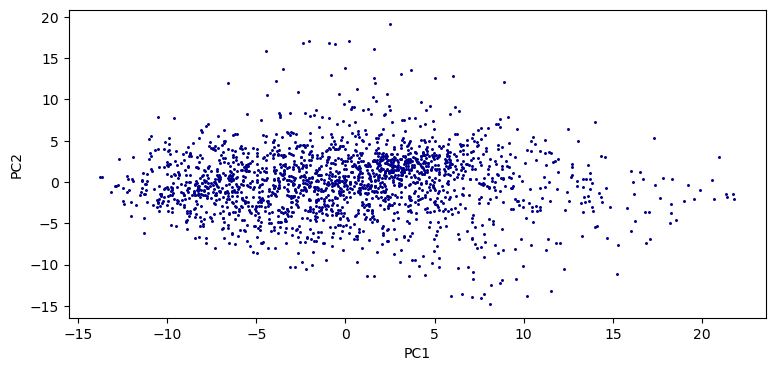

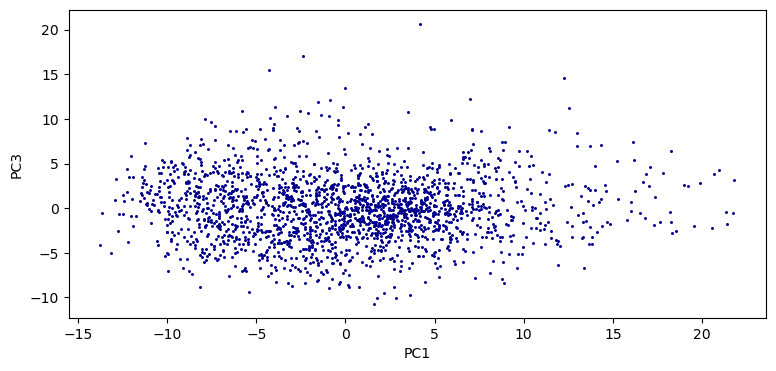

In [10]:
plt.figure(figsize=(9,4))
plt.scatter( x=pca_df["PC1"], y=pca_df["PC2"], color='darkblue', s=1.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(9,4))
plt.scatter( x=pca_df["PC1"], y=pca_df["PC3"], color='darkblue', s=1.3)
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

## 02. Clustering on the principal components

Now that we have the representation of each individual on the PCA space we can cluster in this space. The main advantage is that we can create clusters based on the most relevant information and excluding the noise.

First of all, I need to decide on the number of clusters to use. I will apply the elbow method, which involves calculating the Within-Cluster Sum of Squares (WSS) for different numbers of clusters and analyzing the trend.

By examining the elbow plot, we observe that moving from 1 to 2 clusters results in a significant drop in the WSS curve. This sharp decrease suggests that splitting the data into 2 clusters captures a substantial amount of the structure in the data. Therefore, we choose to proceed with 2 clusters.

This choice is further supported by a sociological perspective, which suggests that Catalan society is primarily divided into two main groups: those who are more supportive of independence and those who lean more towards unionism. This sociopolitical dichotomy aligns with the data-driven decision to adopt a 2-cluster solution.

In [11]:
iner_list = []
cl_list = []

for n_clust in range(20):
    km = KMeans(n_init=10, n_clusters=n_clust+1, random_state=1234)
    km.fit( np.array( pca_df) )
    iner_list.append(km.inertia_)
    cl_list.append(n_clust+1)

C:\Users\Pol\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Pol\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


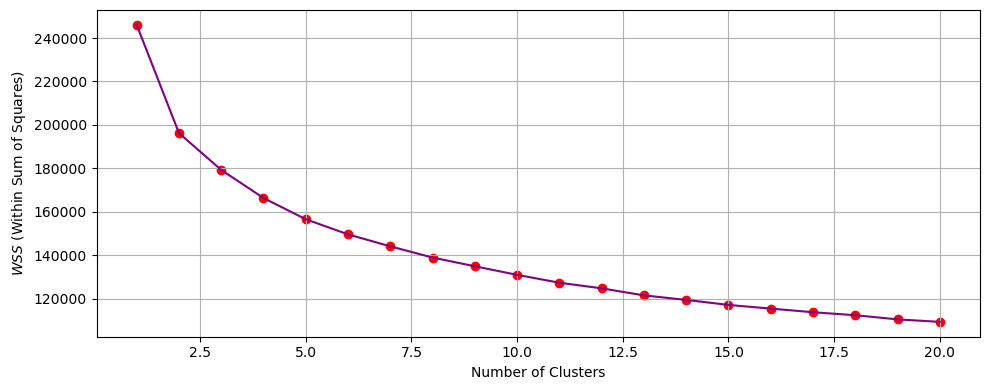

In [12]:
plt.figure(figsize=(10,4))
plt.plot(cl_list, iner_list,c='purple')
plt.scatter(cl_list, iner_list,c='red')
plt.xlabel("Number of Clusters")
plt.ylabel("$WSS$ (Within Sum of Squares)")
plt.grid()
plt.tight_layout()
plt.show()

Let's get the clusters and save them into the dataframe.

In [13]:
km = KMeans(n_init=10, n_clusters=2, random_state=1234)
km.fit( np.array( pca_df) )
clusters = km.fit_predict( np.array( clust_dataset) )
clusters

array([0, 0, 1, ..., 1, 1, 1])

In [14]:
df1["Cluster"] = clusters

Let's see how many individuals we have in each cluster:

In [15]:
df1["Cluster"].value_counts()

Cluster
1    1010
0     990
Name: count, dtype: int64

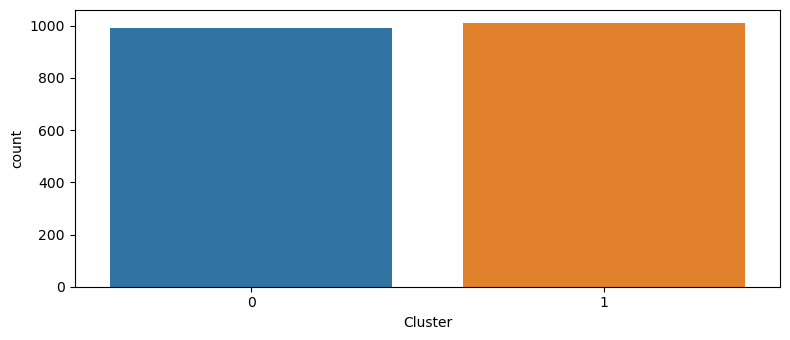

In [16]:
plt.figure(figsize=(8,3.5))
sns.barplot(
    x=df1["Cluster"].value_counts().index,
    y=df1["Cluster"].value_counts()
)
plt.tight_layout()
plt.show()

In [17]:
km.cluster_centers_.shape

(2, 34)

Let's see the clusters on the principal components space:

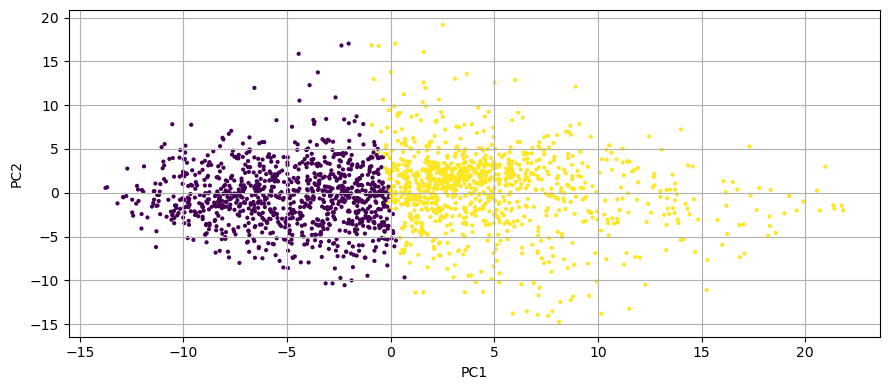

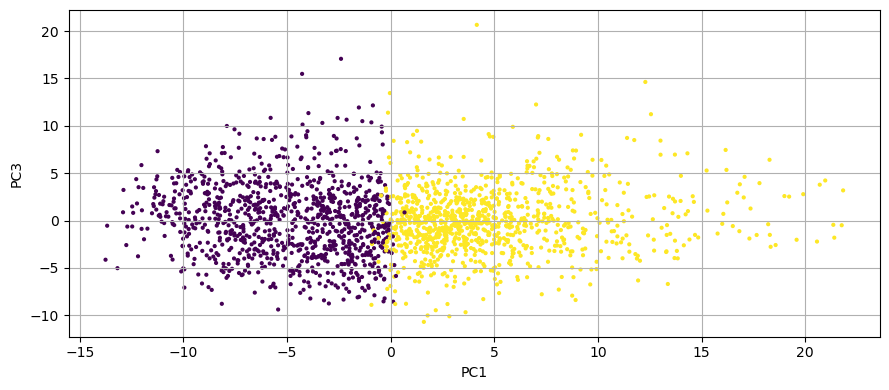

In [18]:
pca_df["Cluster"] = clusters

plt.figure(figsize=(9,4))
plt.scatter( x=pca_df["PC1"], y=pca_df["PC2"], c=pca_df["Cluster"], s=4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.scatter( x=pca_df["PC1"], y=pca_df["PC3"], c=pca_df["Cluster"], s=4)
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.grid()
plt.tight_layout()
plt.show()

Let's interpret the clusters based on the variables we used for the clustering.

The first cluster (blue) is characterized by a stronger ideological inclination towards the left and a significantly greater identification as Catalan rather than Spanish. This group expresses high levels of sympathy for left-wing positions and very low levels of sympathy for right-wing parties, particularly Vox.

The second cluster (orange) presents the opposite profile. Individuals in this group tend to lean more to the right and identify more strongly as Spanish than Catalan. They show lower levels of sympathy for the left and a higher tolerance — or even affinity — for right-wing parties.

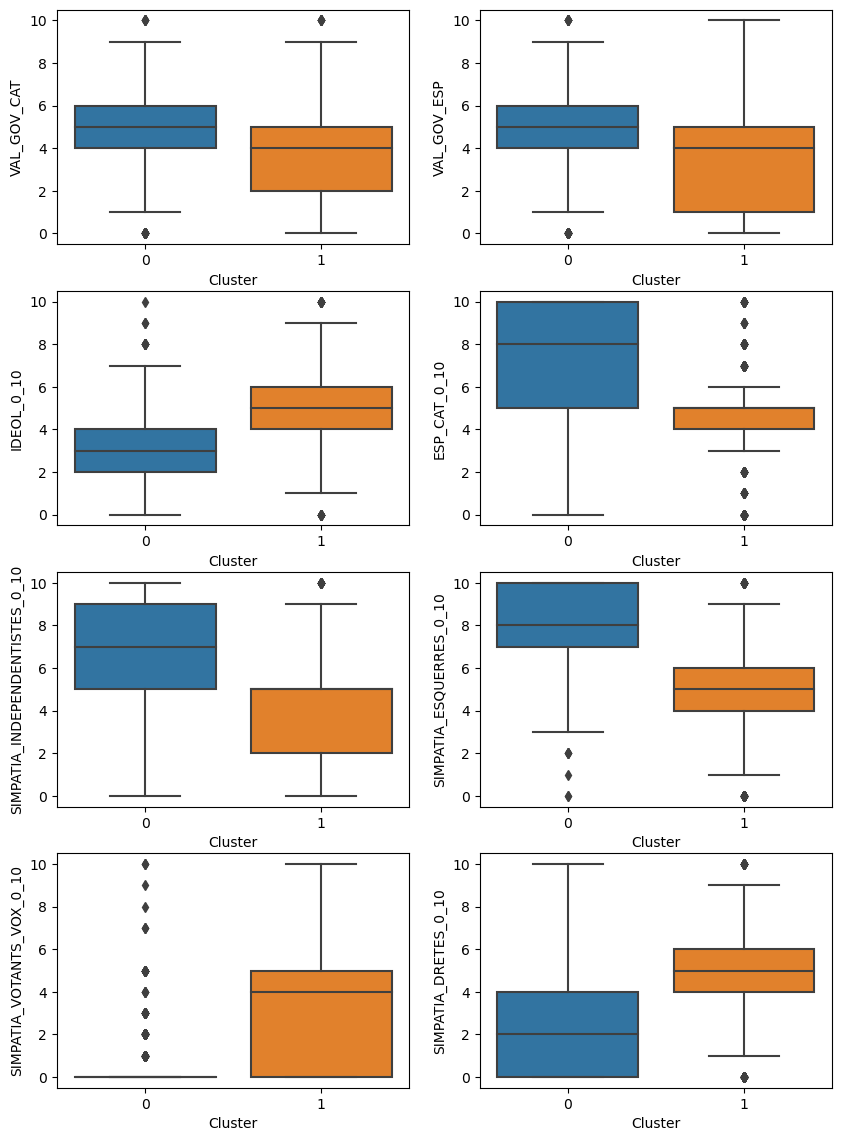

In [19]:
plt.figure(figsize=(10,14))

plt.subplot(4, 2, 1)
sns.boxplot( y=df1["VAL_GOV_CAT"], x=df1["Cluster"] )

plt.subplot(4, 2, 2)
sns.boxplot( y=df1["VAL_GOV_ESP"], x=df1["Cluster"] )

plt.subplot(4, 2, 3)
sns.boxplot( y=df1["IDEOL_0_10"], x=df1["Cluster"] )

plt.subplot(4, 2, 4)
sns.boxplot( y=df1["ESP_CAT_0_10"], x=df1["Cluster"] )

plt.subplot(4, 2, 5)
sns.boxplot( y=df1["SIMPATIA_INDEPENDENTISTES_0_10"], x=df1["Cluster"] )

plt.subplot(4, 2, 6)
sns.boxplot( y=df1["SIMPATIA_ESQUERRES_0_10"], x=df1["Cluster"] )

plt.subplot(4, 2, 7)
sns.boxplot( y=df1["SIMPATIA_VOTANTS_VOX_0_10"], x=df1["Cluster"] )

plt.subplot(4, 2, 8)
sns.boxplot( y=df1["SIMPATIA_DRETES_0_10"], x=df1["Cluster"] )

plt.show()

Finally i will save the dataset with ```Cluster``` column

In [20]:
df1.to_excel('df_clusteritzat.xlsx')